In [1]:
import pandas as pd
import numpy as np
import pickle
from ta.volatility import BollingerBands
import matplotlib.pyplot as plt
import os
import sys


from config import BASE_DIR
print(os.getcwd())
os.chdir(BASE_DIR)
print(BASE_DIR)
import scripts.functions as fn

from scripts.indicators import Fibonacci

c:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www\backtest
C:\Users\lbisa\Dropbox\Cripto\python\InvestingEvolution\ie\www


In [2]:
klines_file =  './backtest/klines/2d01/Completo_BTCUSDT_2d01_2021-01-01_2023-07-31.DataFrame'
#klines_file =  './backtest/klines/2d01/Alcista_BTCUSDT_2d01_2020-09-07_2021-05-03.DataFrame'
#klines_file = './backtest/klines/2d01/Lateral_BTCUSDT_2d01_2023-06-20_2023-10-09.DataFrame'
#klines_file =  './backtest/klines/2d01/Bajista_BTCUSDT_2d01_2021-04-12_2021-07-12.DataFrame'
#klines_file = './backtest/klines/1h01/Completo_BTCUSDT_1h01_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/1h01/Lateral_BTCUSDT_1h01_2023-06-20_2023-10-09.DataFrame'
#klines_file = './backtest/klines/0m15/Completo_XRPUSDT_0m15_2021-01-01_2023-07-31.DataFrame'
#klines_file = './backtest/klines/0m01/Completo_BTCUSDT_0m01_2021-01-01_2023-07-31.DataFrame'

with open(klines_file, 'rb') as file:
    df = pickle.load(file)

start_date = klines_file.split('/')[4].split('_')[3] #Extrae la fecha de inicio
start_date = pd.to_datetime(start_date, format='%Y-%m-%d')
start_date = start_date.replace(hour=0, minute=0, second=0)




<Axes: >

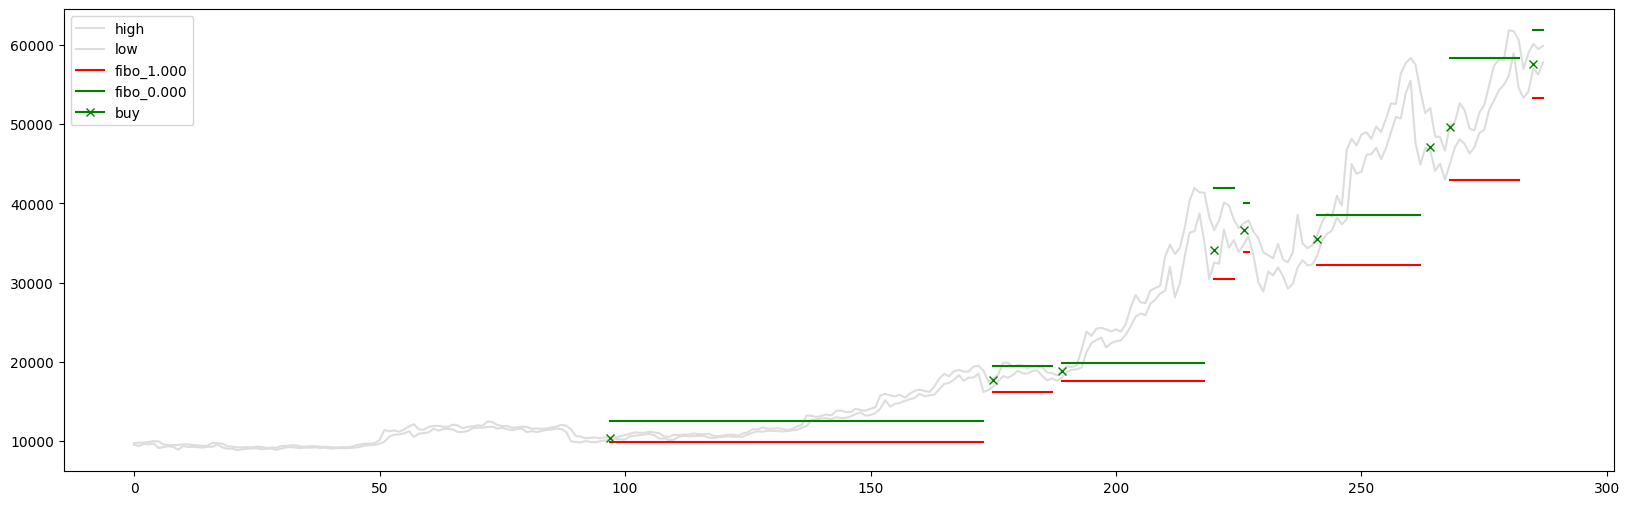

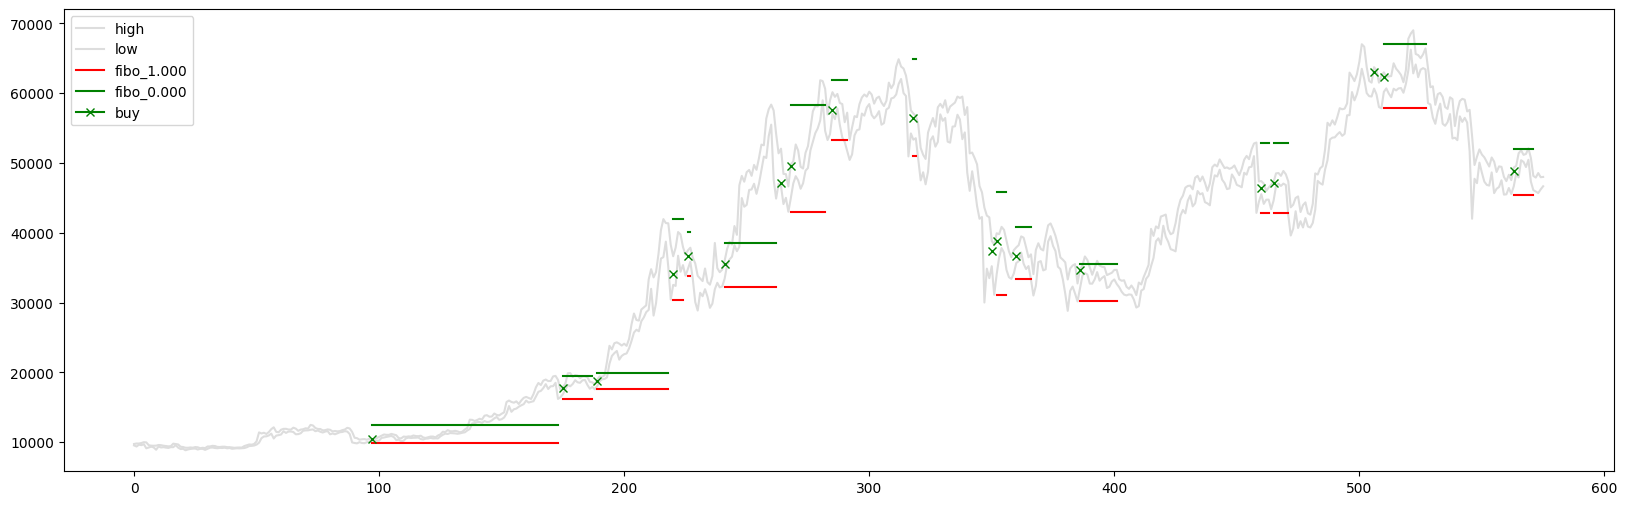

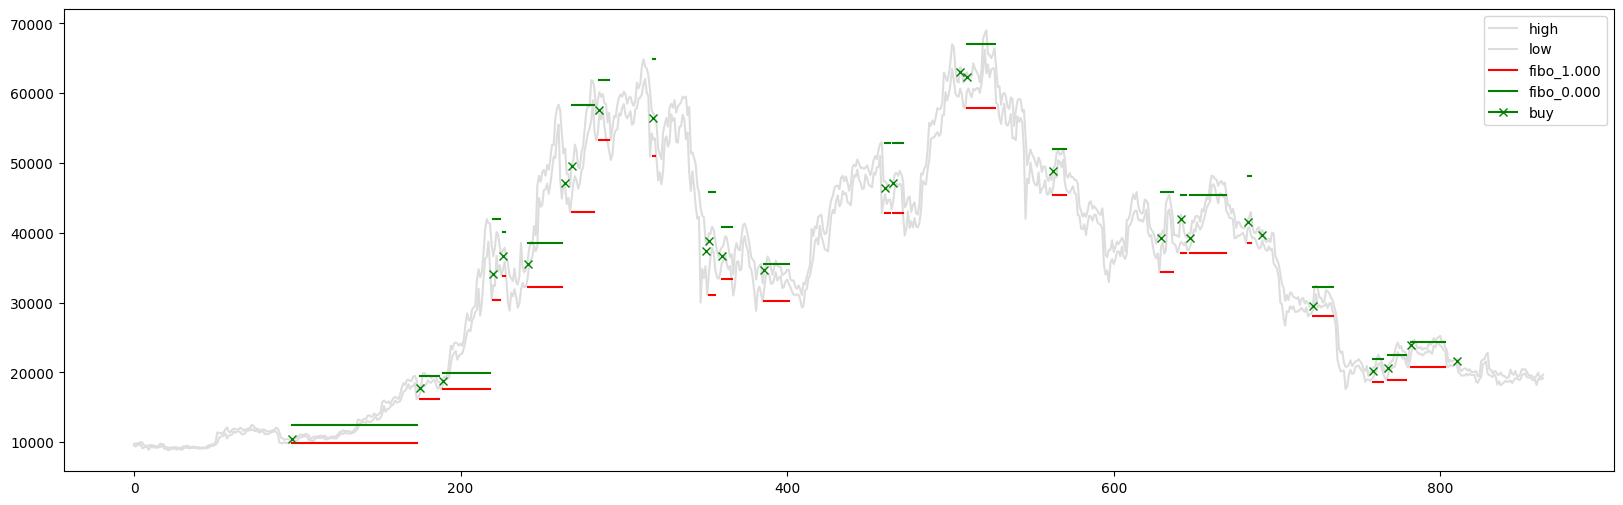

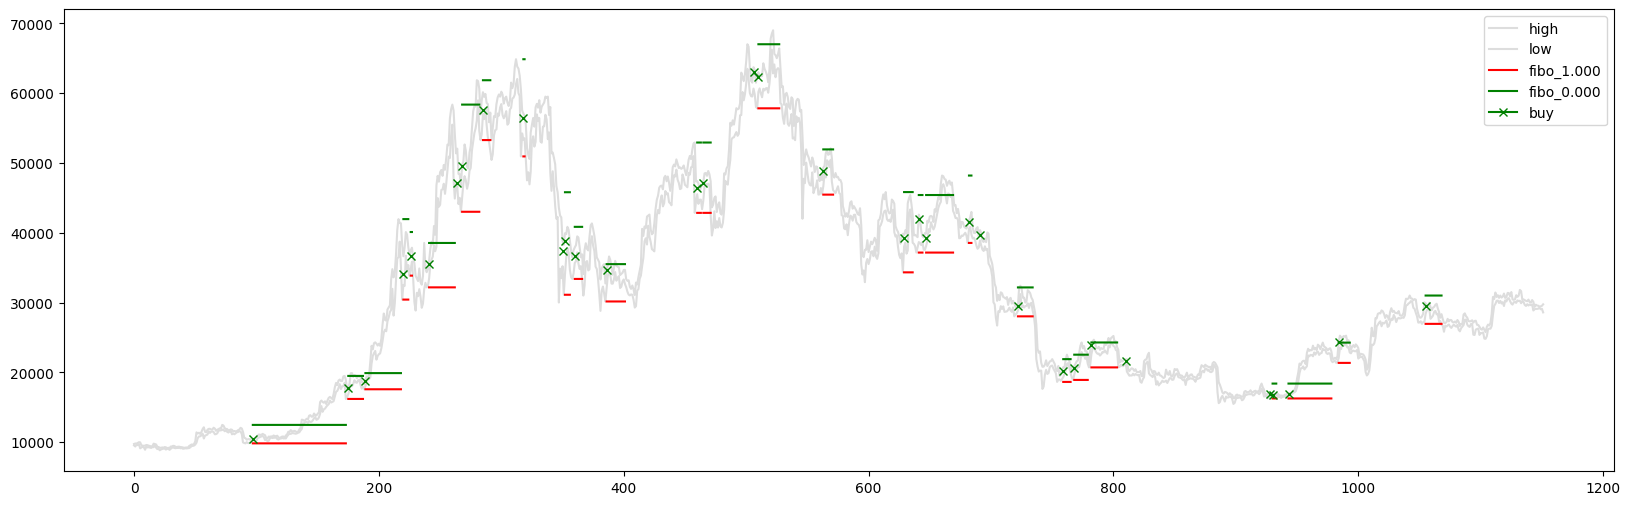

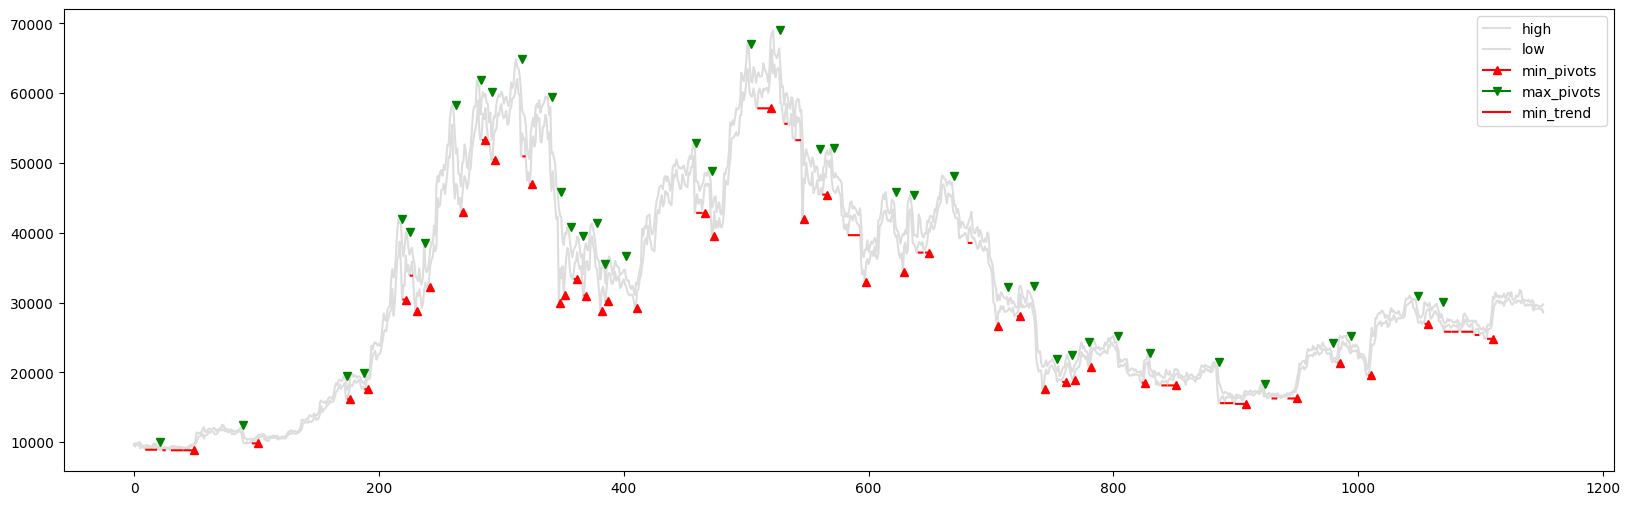

In [3]:

# Aplicar la función signal
df = Fibonacci().long(df)
df['buy'] = np.where(df['fibo']==1,df['close'],None)

graphs = 4
recs = df['datetime'].count()
frec = int(recs/graphs)
ini = 0
for i in range(1,graphs+1):
    end = i*frec
    df[ini:end][['high','low','fibo_1.000','fibo_0.000','buy']].plot(figsize=(20,6),style=['#dddddd','#dddddd','r','g','g-x'])#   ,'buy_price','sell_price'
#df[['high','low','fibol_1.000','fibo_0.000','buy']].plot(figsize=(20,6),style=['#dddddd','#dddddd','r','g','g-x'])#   ,'buy_price','sell_price'
df[['high','low','min_pivots','max_pivots','min_trend']].plot(figsize=(20,6),style=['#dddddd','#dddddd','r-^','g-v','r'])#   ,'buy_price','sell_price'
